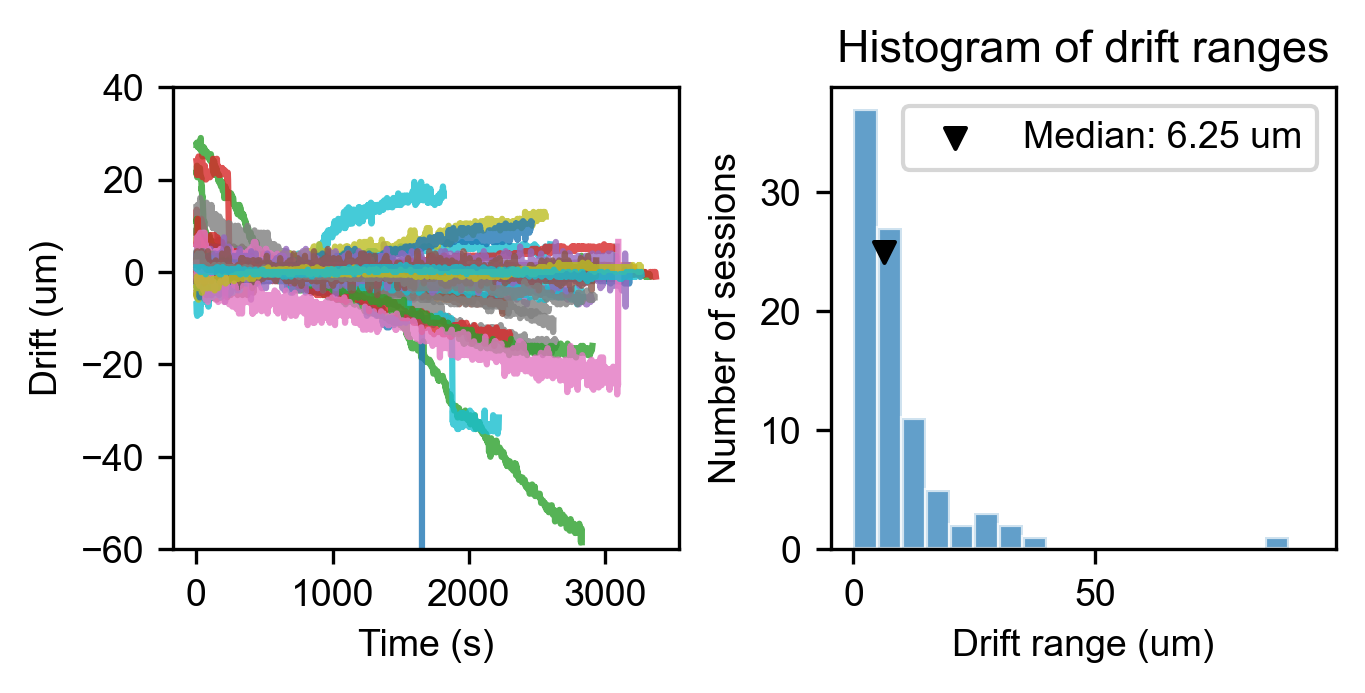

In [6]:
import os
import numpy as np
from kilosort.io import load_ops
import matplotlib.pyplot as plt
from matplotlib import gridspec, rcParams

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 9

fig = plt.figure(figsize=(5,2), dpi=300)
grid = gridspec.GridSpec(1, 2, figure=fig,wspace=0.3)
ax = fig.add_subplot(grid[0,0])

shift_ranges = []

basedir='F:/NSD_FULL_RAW'
for ses_folder in os.listdir(basedir):
    ops_file = os.path.join(basedir,ses_folder,'kilosort_def_5block_97','ops.npy')
    ops_data = load_ops(ops_file)
    dshift = ops_data['dshift']
    dshift = np.median(dshift,1)
    x_here = np.arange(0, ops_data['Nbatches'])*2
    ax.plot(x_here, dshift,label=ses_folder,alpha=0.8)
    shift_ranges.append(np.max(dshift) + np.abs(np.min(dshift)))

ax.set_xlabel('Time (s)')
ax.set_ylabel('Drift (um)')
ax.set_ylim([-60,40])

ax2 = fig.add_subplot(grid[0,1])
ax2.hist(shift_ranges, bins=np.arange(0,100,5), edgecolor='white', alpha=0.7)
ax2.set_xlabel('Drift range (um)')
ax2.set_ylabel('Number of sessions')
ax2.set_title('Histogram of drift ranges')

median_value = np.median(shift_ranges)
ax2.scatter(median_value, 25, color='black', marker='v', s=25, label=f'Median: {median_value:.2f} um', zorder=5)
ax2.legend()
output_file = 'C:/Users/moonl/Desktop/NNN/Figs/FS1/dshift_plot.pdf'
plt.savefig(output_file, format='pdf')
